True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2018 to 2003
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Faelle                                        16 non-null     float64
 1   Pflegetage                                    16 non-null     object 
 2   Durchschnittliche Verweildauer in&nbsp;Tagen  16 non-null     float64
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes


Faelle                                          float64
Pflegetage                                      float64
Durchschnittliche Verweildauer in&nbsp;Tagen    float64
dtype: object


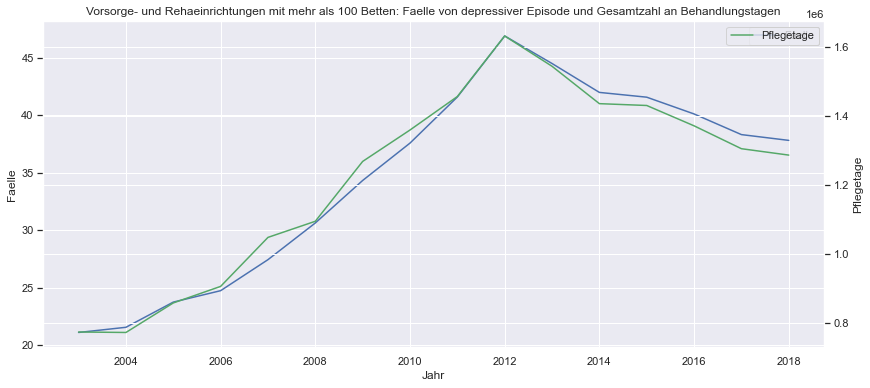

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import plotly.express as px
#import plotly.graph_objects as go 

sns.set()
path_to_file = Path.cwd() / Path('processed data') / Path('DepressiveEpisode_Jahr_Faelle_Reha_removedheader_cleaned.csv')
print(path_to_file.exists())

year_cases_data = pd.read_csv(path_to_file, index_col='Jahr', encoding='utf-8')
year_cases_data.info()

# replace all '.' in the Pflegetage column as these result in an error when converting to float
year_cases_data['Pflegetage'] = year_cases_data['Pflegetage'].apply(lambda x: float(x.replace('.', '')))
print(year_cases_data.dtypes)











In [ ]:
fig = px.line(year_cases_data, x=year_cases_data.index, y='Faelle', title='Plotly plot')
fig.show()

In [ ]:

plt.figure(figsize=(14,6))
plt.title('Vorsorge- und Rehaeinrichtungen mit mehr als 100 Betten: Faelle von depressiver Episode und Gesamtzahl an Behandlungstagen')
sns.lineplot(data=year_cases_data['Faelle'], label='Faelle')

ax2 = plt.twinx()
sns.lineplot(data=year_cases_data['Pflegetage'],  color='g', ax=ax2, label='Pflegetage')



plt.show()